In [1]:
from array import array
import math
import numpy as np
import random



In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x

par = array('d')
par.append(0.4321)
par.append(1.6789)
par.append(0.50)
par.append(1.0000)

In [3]:

m = 2 #Set the order of the polynomial
n = 15 #Set the number of data points

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
for i in range(0,n):
    x.append(i+1)
    y.append(generator_function(x[i],par) + 10.0*random.gauss(0.0,1.0))
    ex.append(0.0)
    ey.append(5.0*math.sqrt(math.fabs(y[i])))

In [6]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [7]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("Cofactor matrix:")
print (a)
print ("Constant matrix:")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("Inverse matrix")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
print (coeff)
        

Cofactor matrix:
[[0.01070298 0.02316036 0.08422145]
 [0.02316036 0.08422145 0.51245224]
 [0.08422145 0.51245224 4.44310269]]
Constant matrix:
[[ 0.52]
 [ 4.72]
 [49.52]]
Inverse matrix
[[ 524.16239229 -280.61412095   22.42928505]
 [-280.61412095  190.04251979  -16.59965821]
 [  22.42928505  -16.59965821    1.71445622]]
Diagonal Check:
[[ 1.00000000e+00  1.56453236e-15  1.55451104e-17]
 [-6.60246298e-16  1.00000000e+00  7.84525111e-17]
 [ 1.62871514e-15  1.73868291e-15  1.00000000e+00]]
Coefficients:
[[ 58.76398883]
 [-70.93372397]
 [ 18.21271371]]


In [8]:
yfit = 0
error_sum = 0
for j in range(0,n):
    for k in range(0,m+1):
        yfit = yfit + coeff[k]*math.pow(x[j],k)
    print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
    error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
    yfit = 0
    
chi2 = error_sum/(n-m)
print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))

i = 0  y = -8.006151  yfit = 6.042979
i = 1  y = 14.933143  yfit = -10.252604
i = 2  y = 22.212907  yfit = 9.877240
i = 3  y = 92.561539  yfit = 66.432512
i = 4  y = 150.265224  yfit = 159.413212
i = 5  y = 242.071157  yfit = 288.819338
i = 6  y = 369.568721  yfit = 454.650893
i = 7  y = 548.844038  yfit = 656.907874
i = 8  y = 768.963842  yfit = 895.590283
i = 9  y = 1065.004634  yfit = 1170.698120
i = 10  y = 1401.655861  yfit = 1482.231384
i = 11  y = 1828.179333  yfit = 1830.190075
i = 12  y = 2304.720493  yfit = 2214.574194
i = 13  y = 2860.230062  yfit = 2635.383740
i = 14  y = 3500.352453  yfit = 3092.618713
chi2/dof = 9.459103 / 12.000000


In [9]:
print ("Coefficients with Errors:")
for k in range(0,m+1):
    print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

Coefficients with Errors:
p0 = 58.763989 +/- 22.894593
p1 = -70.933724 +/- 13.785591
p2 = 18.212714 +/- 1.309372


[ 58.76398926 -70.93372424  18.21271373] [[ 524.16238375 -280.61411394   22.42928469]
 [-280.61411394  190.04251406  -16.59965785]
 [  22.42928469  -16.59965785    1.7144562 ]]
Coefficients (from curve_fit)
[ 58.76398926 -70.93372424  18.21271373]
Covariance Matrix (from curve_fit)
[[ 524.16238375 -280.61411394   22.42928469]
 [-280.61411394  190.04251406  -16.59965785]
 [  22.42928469  -16.59965785    1.7144562 ]]
Chi^2 / dof = 9.459E+00 / 12
Fit Parameter 0: 5.876E+01 +/- 2.289E+01
0 1 -8.891E-01
0 2 7.482E-01
Fit Parameter 1: -7.093E+01 +/- 1.379E+01
1 2 -9.196E-01
Fit Parameter 2: 1.821E+01 +/- 1.309E+00


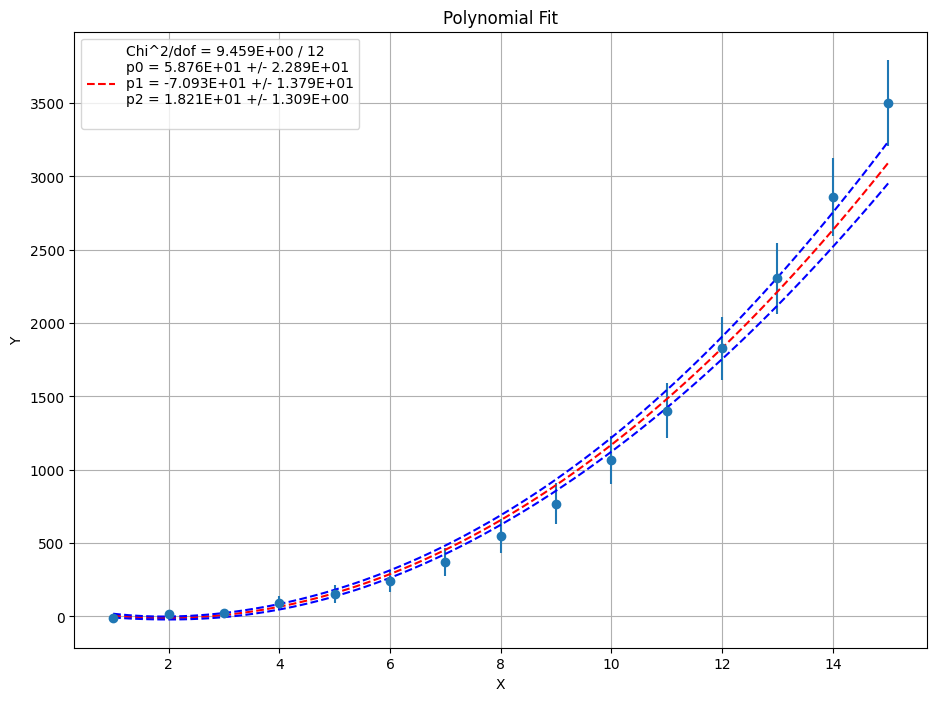

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Polynomial Fit")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.errorbar(x,y,yerr=ey,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
#popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals)
popt, pcov = curve_fit(fitfunction,x,y,sigma=ey,p0=init_vals,absolute_sigma=True)

print (popt,pcov)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(ey[i]*ey[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(n-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()

Welcome to JupyROOT 6.26/06
pol2
Fit 1: 9.459103 12.000000 



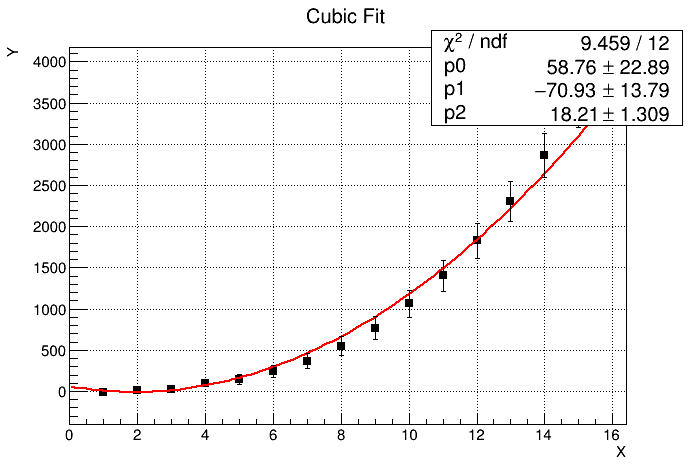

In [11]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
c1 = TCanvas( 'c1', 'Fitting Example with Errors', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

poltype = "pol"+str(m)
print (poltype)
gr = TGraphErrors(n,x,y,ex,ey)
pfit1 = TF1("pfit1",poltype)
gr.SetMarkerStyle(21)
gr.SetTitle("Cubic Fit")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
gStyle.SetOptFit(1)
c1.Draw()